In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.features.cleaning import clean_data
from src.utils import get_project_root

In [21]:
dir_root = get_project_root()
dir_data = 'data'
filename_data_brain = os.path.join(
    dir_root,
    dir_data,
    'survival_brain_2000_to_2020_seer_2022_db.csv'
)
data_raw = pd.read_csv(filename_data_brain)

/tmp/ipykernel_26257/838592508.py:8: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv(filename_data_brain)


In [22]:
data = clean_data(data_raw)

In [23]:
print(data.columns)

Index(['Age recode with <1 year olds', 'Sex', 'Year of diagnosis',
       'PRCDA 2020', 'Race recode (W, B, AI, API)',
       'Origin recode NHIA (Hispanic, Non-Hisp)',
       'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)',
       'TNM 7/CS v0204+ Schema (thru 2017)', 'AYA site recode 2020 Revision',
       'ICCC site recode 3rd edition/IARC 2017',
       ...
       'Age Standard for Survival (15-44,45-54,55-64,65-74,75+)',
       'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total',
       'Sex (no total)',
       'Race recode (White, Black, Other, Unknown) - no total',
       'Year of diagnosis (2000-2019 by 5)',
       'End Calc Vital Status (Adjusted)', 'Number of Intervals (Calculated)',
       'Age Standard for Survival (15-44,45-54,55-64,65-74,75+).1',
       'Alive at last contact',
       'Median household income inflation adj to 2021 (thousands USD)'],
      dtype='object', length=127)


For an initial look, let's just define a list of some of the  columns that look interesting.

In [24]:
data.head(10)

Age recode with <1 year olds     Sex  Year of diagnosis PRCDA 2020  \
0                             15  Female               2000  Not PRCDA   
2                             15    Male               2000  Not PRCDA   
3                             15    Male               2000  Not PRCDA   
4                             15    Male               2004  Not PRCDA   
5                             15  Female               2001  Not PRCDA   
6                             15    Male               2002  Not PRCDA   
7                             15    Male               2000  Not PRCDA   
8                             15    Male               2001  Not PRCDA   
9                             15    Male               2003  Not PRCDA   
10                            15    Male               2001  Not PRCDA   

   Race recode (W, B, AI, API) Origin recode NHIA (Hispanic, Non-Hisp)  \
0                        White             Non-Spanish-Hispanic-Latino   
2                        White                 Spanish-Hispanic-Latino   
3    Asian or Pacific Islander             Non-Spanish-Hispanic-Latino   
4                        White             Non-Spanish-Hispanic-Latino   
5                        White                 Spanish-Hispanic-Latino   
6                        Black             Non-Spanish-Hispanic-Latino   
7                        White             Non-Spanish-Hispanic-Latino   
8                        White                 Spanish-Hispanic-Latino   
9                        White             Non-Spanish-Hispanic-Latino   
10                       White             Non-Spanish-Hispanic-Latino   

   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)  \
0                                  Non-Hispanic White           
2                                Hispanic (All Races)           
3              Non-Hispanic Asian or Pacific Islander           
4                                  Non-Hispanic White           
5                                Hispanic (All Races)           
6                                  Non-Hispanic Black           
7                                  Non-Hispanic White           
8                                Hispanic (All Races)           
9                                  Non-Hispanic White           
10                                 Non-Hispanic White           

   TNM 7/CS v0204+ Schema (thru 2017)  \
0                               Brain   
2                               Brain   
3                               Brain   
4                               Brain   
5                               Brain   
6                               Brain   
7                               Brain   
8                               Brain   
9                               Brain   
10                              Brain   

                      AYA site recode 2020 Revision  \
0                   3.1.2.2 Glioblastoma - invasive   
2                   3.1.2.2 Glioblastoma - invasive   
3             7.3 Germ cell and trophoblastic - CNS   
4                   3.1.2.2 Glioblastoma - invasive   
5              3.1.1.2 Oligodendroglioma - invasive   
6                     3.1.4.1 Pilocytic astrocytoma   
7              3.1.1.2 Oligodendroglioma - invasive   
8             7.3 Germ cell and trophoblastic - CNS   
9                   3.1.2.2 Glioblastoma - invasive   
10  3.1.4.3 Other astrocytoma/astroglial - invasive   

              ICCC site recode 3rd edition/IARC 2017  ...  \
0                                  IIIb Astrocytomas  ...   
2                                  IIIb Astrocytomas  ...   
3   Xa Intracranial and intraspinal germ cell tumors  ...   
4                                  IIIb Astrocytomas  ...   
5                                 IIId Other gliomas  ...   
6                                  IIIb Astrocytomas  ...   
7                                 IIId Other gliomas  ...   
8   Xa Intracranial and intraspinal germ cell tumors  ...   
9                                  IIIb Astrocytoma

In [25]:
categorical_columns = [
    'Sex',
    'Race recode (W, B, AI, API)', 
    'Origin recode NHIA (Hispanic, Non-Hisp)', 
    'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)', 
    'Vital status recode (study cutoff used)', 
    'SEER cause-specific death classification', 
    'SEER other cause of death classification', 
    'Type of Reporting Source', 
    'Marital status at diagnosis', 
    'Rural-Urban Continuum Code', 
    'End Calc Vital Status (Adjusted)', 
]
numerical_columns = [
    'Year of diagnosis', 
    'Year of follow-up recode', 
    'Total number of in situ/malignant tumors for patient', 
    'Year of diagnosis (2000-2019 by 5)', 
    'Survival months'
]
other_useful_columns = [
    'Alive at last contact', 
    'Year of death recode', 
    'Age recode with <1 year olds', 
    'Median household income inflation adj to 2021 (thousands USD)'
]
all_useful_columns = categorical_columns + numerical_columns + other_useful_columns
data = data.astype({col: 'category' for col in categorical_columns})

In [26]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(
    data, 
    test_size=0.2, 
    random_state=2984, 
    shuffle=True, 
    stratify=data['Vital status recode (study cutoff used)']
)

# Make a smaller dataframe for testing
d = data_train[all_useful_columns]

In [27]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61133 entries, 51318 to 31221
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   Sex                                                            61133 non-null  category
 1   Race recode (W, B, AI, API)                                    61133 non-null  category
 2   Origin recode NHIA (Hispanic, Non-Hisp)                        61133 non-null  category
 3   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)     61133 non-null  category
 4   Vital status recode (study cutoff used)                        61133 non-null  category
 5   SEER cause-specific death classification                       61133 non-null  category
 6   SEER other cause of death classification                       61133 non-null  category
 7   Type of Reporting Source                          

## Exploratory Data Analysis

In [28]:
d.head(10)

Sex Race recode (W, B, AI, API)  \
51318    Male                       White   
53949    Male                       White   
31599    Male                       White   
44685  Female                       White   
25873    Male   Asian or Pacific Islander   
23621  Female                       White   
55767  Female                       White   
356    Female                       White   
61564    Male                       White   
12793    Male                       White   

      Origin recode NHIA (Hispanic, Non-Hisp)  \
51318             Non-Spanish-Hispanic-Latino   
53949             Non-Spanish-Hispanic-Latino   
31599             Non-Spanish-Hispanic-Latino   
44685             Non-Spanish-Hispanic-Latino   
25873             Non-Spanish-Hispanic-Latino   
23621             Non-Spanish-Hispanic-Latino   
55767             Non-Spanish-Hispanic-Latino   
356               Non-Spanish-Hispanic-Latino   
61564             Non-Spanish-Hispanic-Latino   
12793                 Spanish-Hispanic-Latino   

      Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)  \
51318                                 Non-Hispanic White           
53949                                 Non-Hispanic White           
31599                                 Non-Hispanic White           
44685                                 Non-Hispanic White           
25873             Non-Hispanic Asian or Pacific Islander           
23621                                 Non-Hispanic White           
55767                                 Non-Hispanic White           
356                                   Non-Hispanic White           
61564                                 Non-Hispanic White           
12793                               Hispanic (All Races)           

      Vital status recode (study cutoff used)  \
51318                                   Alive   
53949                                    Dead   
31599                                    Dead   
44685                                    Dead   
25873                                   Alive   
23621                                    Dead   
55767                                    Dead   
356                                     Alive   
61564                                    Dead   
12793                                    Dead   

      SEER cause-specific death classification  \
51318             Alive or dead of other cause   
53949    Dead (attributable to this cancer dx)   
31599    Dead (attributable to this cancer dx)   
44685    Dead (attributable to this cancer dx)   
25873             Alive or dead of other cause   
23621    Dead (attributable to this cancer dx)   
55767    Dead (attributable to this cancer dx)   
356               Alive or dead of other cause   
61564    Dead (attributable to this cancer dx)   
12793    Dead (attributable to this cancer dx)   

      SEER other cause of death classification  \
51318              Alive or dead due to cancer   
53949              Alive or dead due to cancer   
31599              Alive or dead due to cancer   
44685              Alive or dead due to cancer   
25873              Alive or dead due to cancer   
23621              Alive or dead due to cancer   
55767              Alive or dead due to cancer   
356                Alive or dead due to cancer   
61564              Alive or dead due to cancer   
12793              Alive or dead due to cancer   

                                Type of Reporting Source  \
51318            Hospital inpatient/outpatient or clinic   
53949            Hospital inpatient/outpatient or clinic   
31599            Hospital inpatient/outpatient or clinic   
44685            Hospital inpatient/outpatient or clinic   
25873  Other hospital outpatient unit or surgery cent...   
23621            Hospital inpatient/outpatient or clinic   
55767            Hospital inpatient/outpatient or clinic   
356              Hospital inpatient/outpatient or clinic   
61564            Hospital inpatient/outpati

### Data Visualization

We want to get a rough idea of the distributions within the data. This initial look should be fairly cursory, since we haven't even done the train-test split yet.

Below are several quick summary plots of some of the most important features. (There are a few formatting issues.)

In [29]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels)

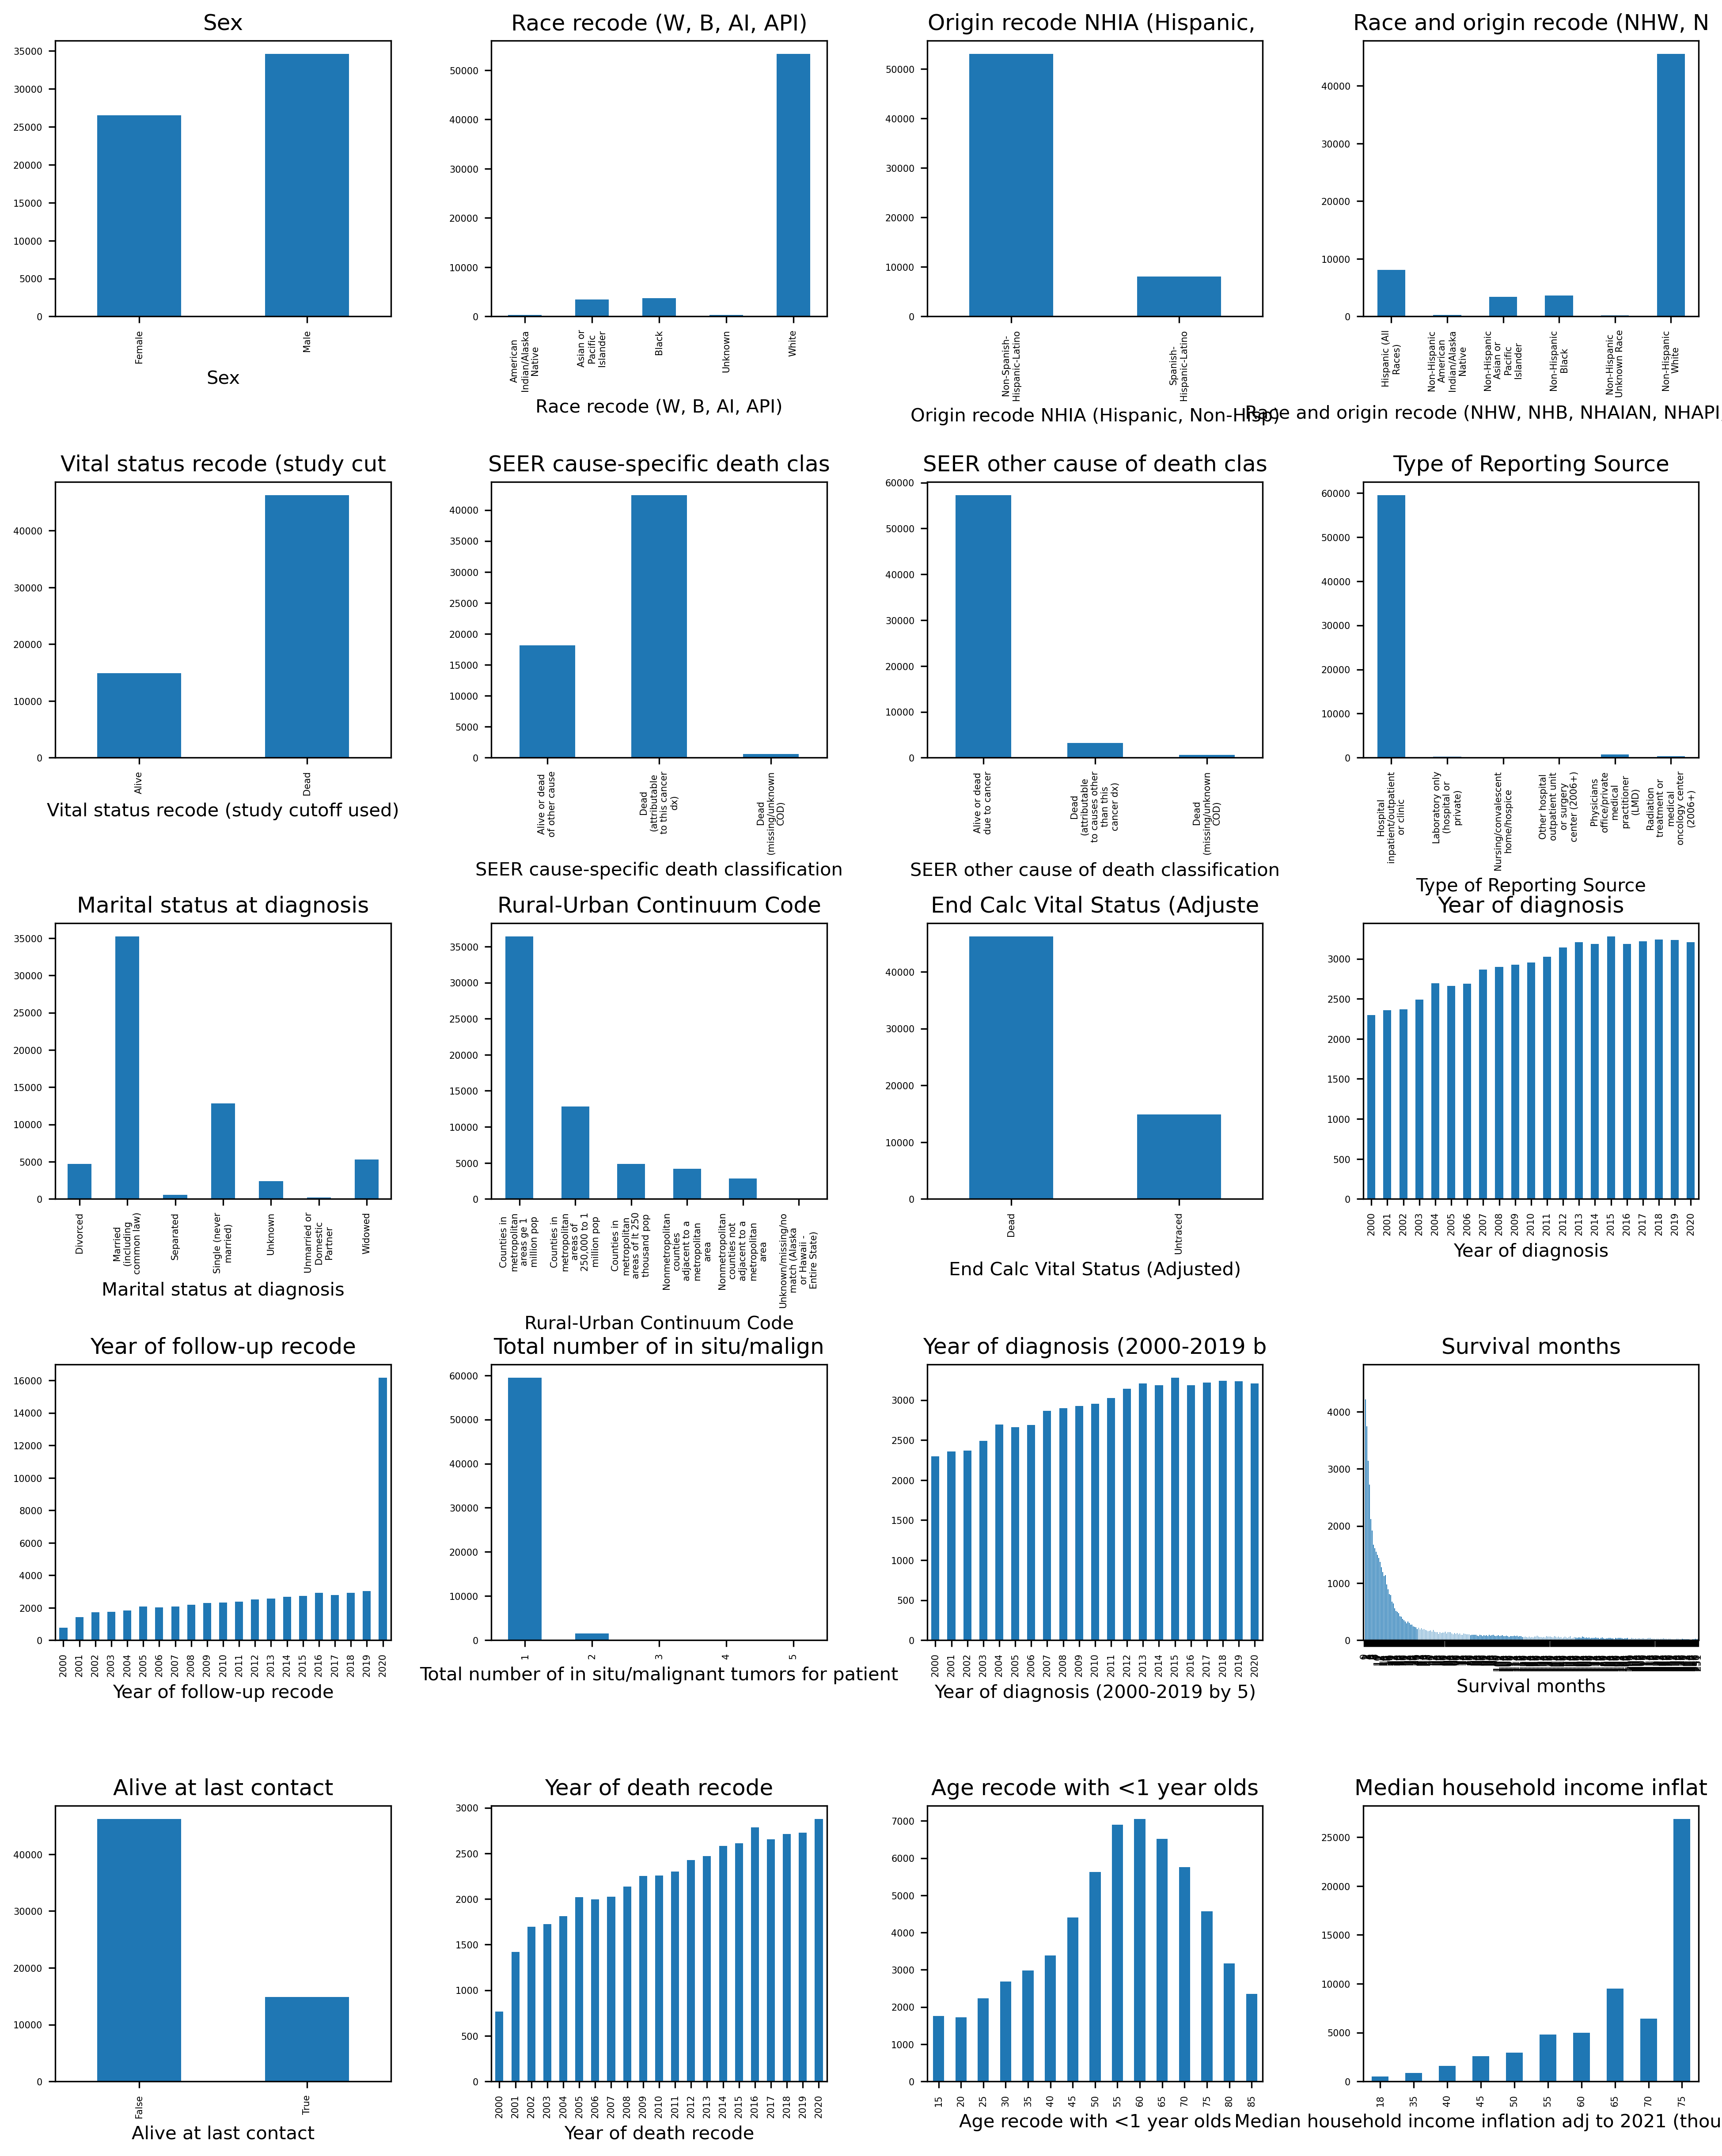

In [30]:
fig, axes = plt.subplots(5, 4, figsize=(16,20), dpi=300)
for col, ax in zip(d, axes.ravel()):
    d[col].value_counts().sort_index().plot.bar(ax=ax, title=col[:30])
    wrap_labels(ax, 15)
    ax.tick_params(axis='both', which='major', labelsize=5)
fig.subplots_adjust(wspace=0.3, hspace=0.6)

In [31]:
import seaborn as sns
sns.set_theme(rc={"figure.dpi": 100})

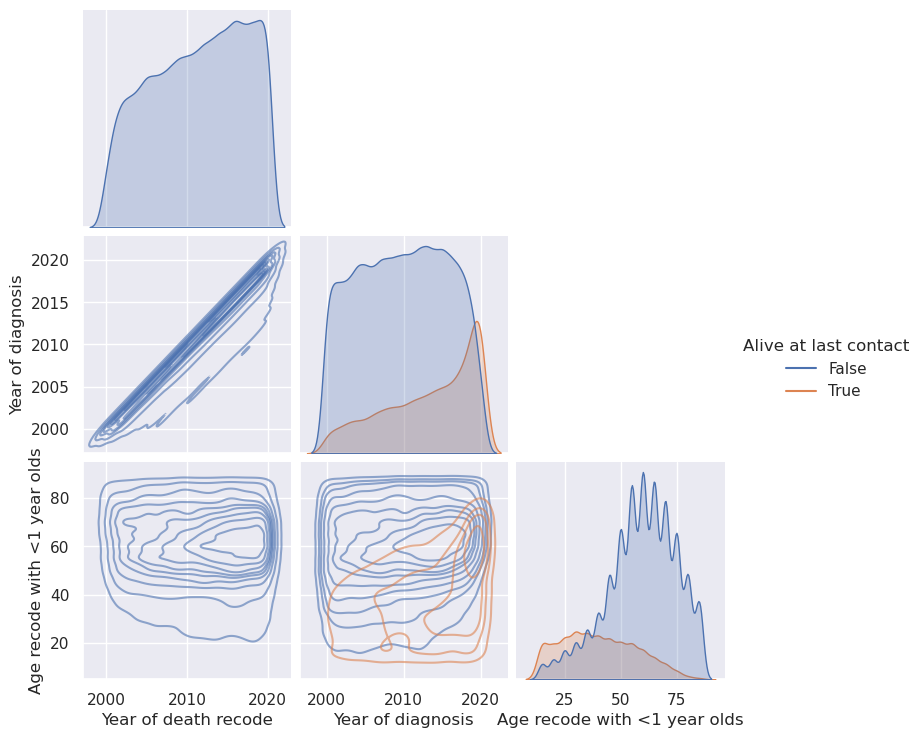

In [32]:
c = [
    'Year of death recode', 
    'Year of diagnosis', 
    'Age recode with <1 year olds', 
    # 'Sex', 
    # 'Race recode (W, B, AI, API)', 
    # 'Total number of in situ/malignant tumors for patient', 
    # # 'Alive at last contact', 
    # 'Median household income inflation adj to 2021 (thousands USD)'
]
sns.pairplot(
    data=d,
    x_vars=c,
    y_vars=c,
    hue='Alive at last contact',
    plot_kws={'alpha': 0.6},
    kind='kde',
    corner=True
)

(Note that the KDE in the distribution plot is smoothing over the age ranges.)

array([[<Axes: title={'center': 'Age recode with <1 year olds'}>]],
      dtype=object)

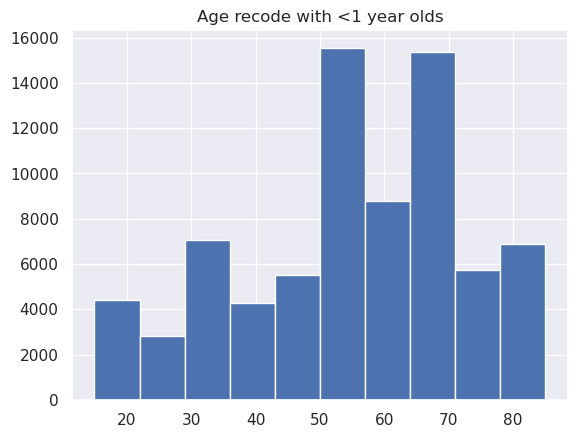

In [33]:
data.hist(['Age recode with <1 year olds'])

<Axes: xlabel='Age recode with <1 year olds', ylabel='Survival months'>

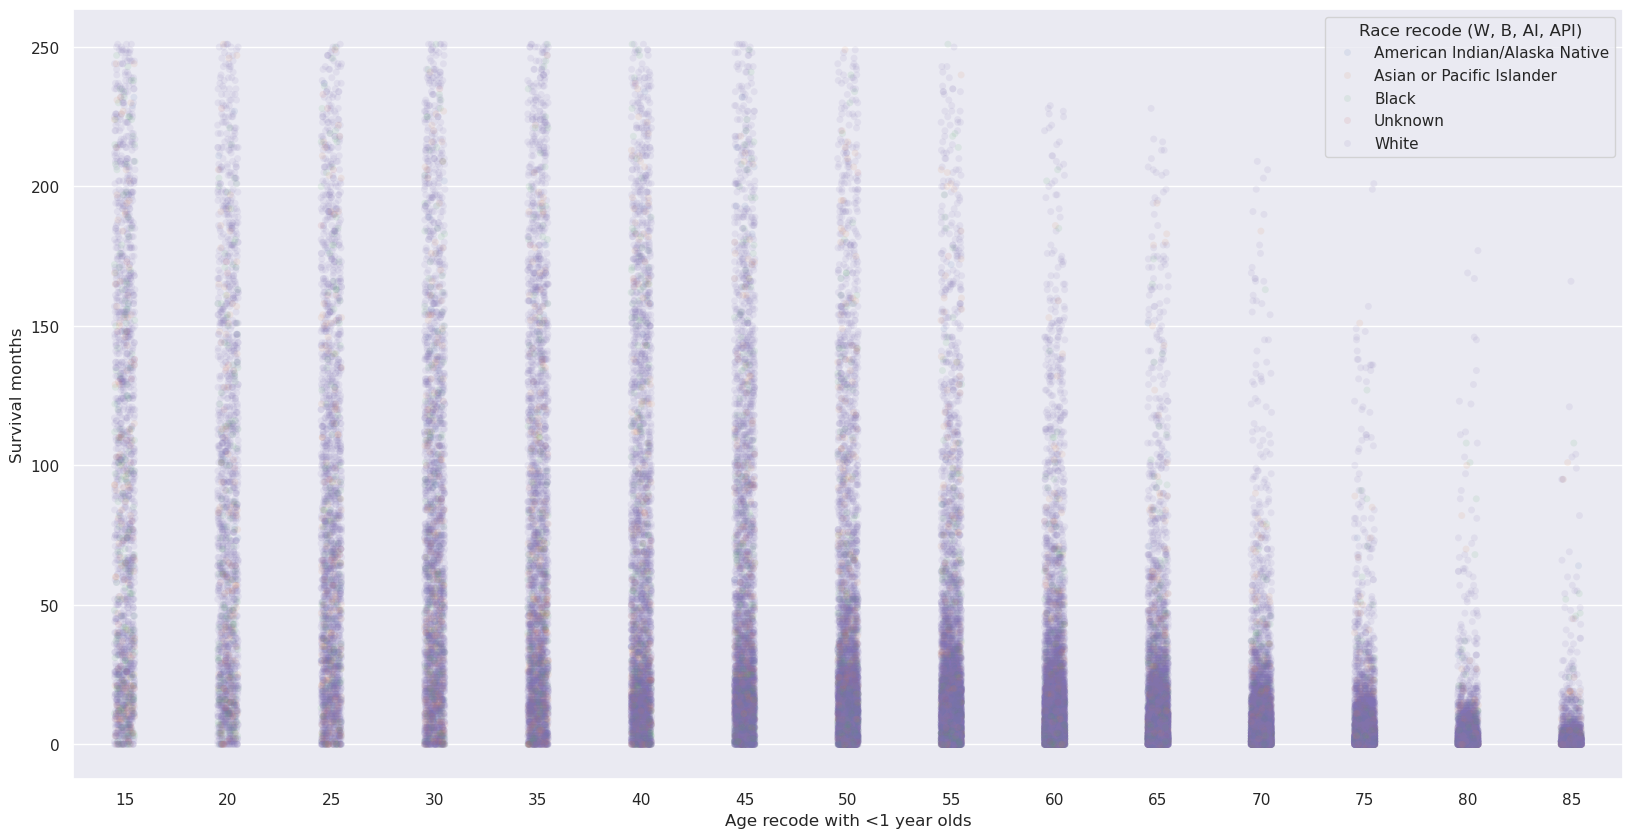

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(
    ax=ax,
    data=d,
    x='Age recode with <1 year olds',
    y='Survival months',
    hue='Race recode (W, B, AI, API)',
    alpha=0.1
)

Since we can't see a whole lot here, let's make a plot for each age range.

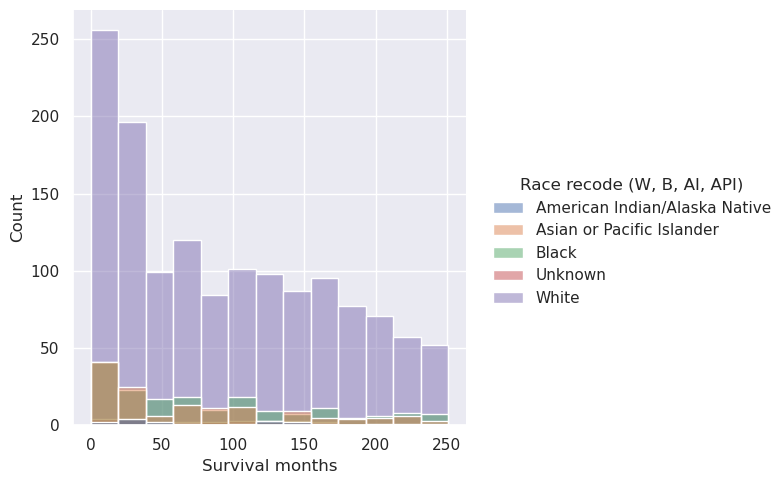

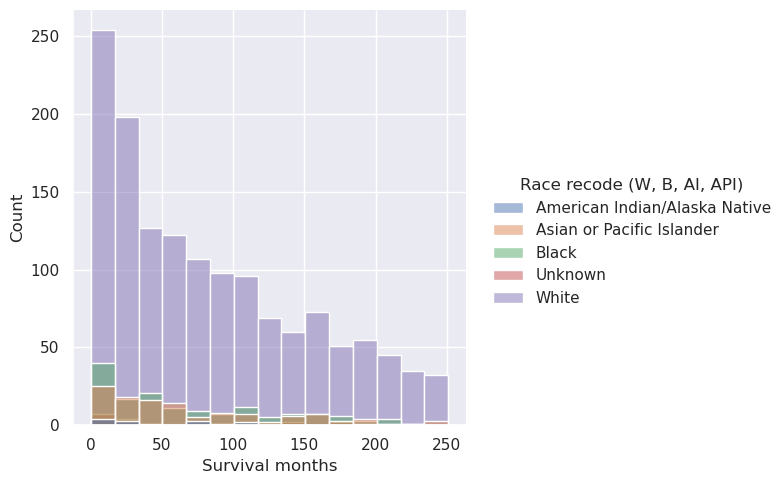

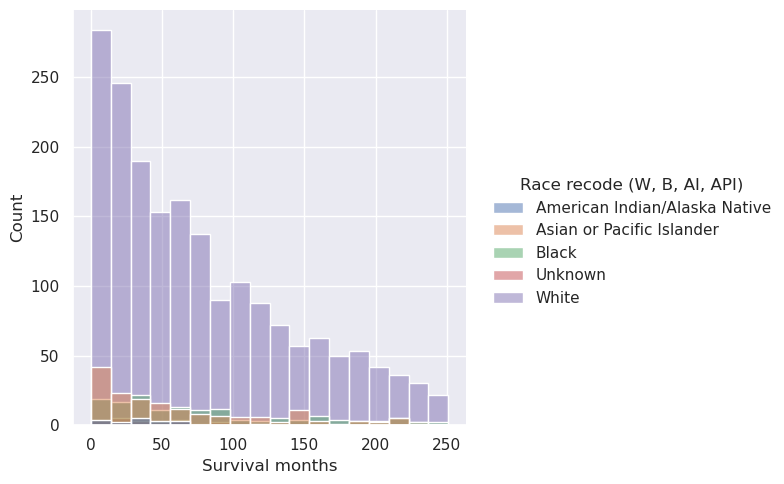

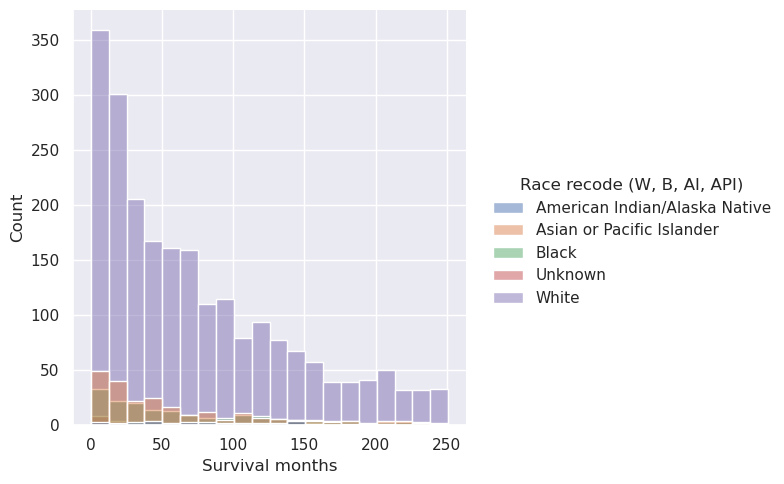

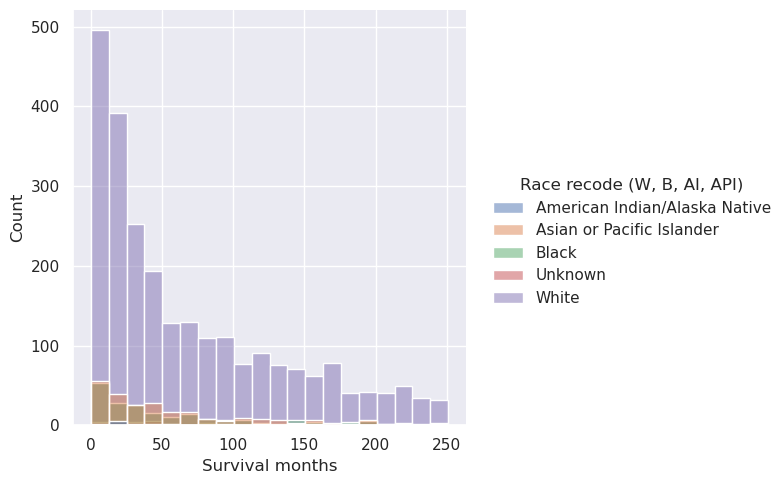

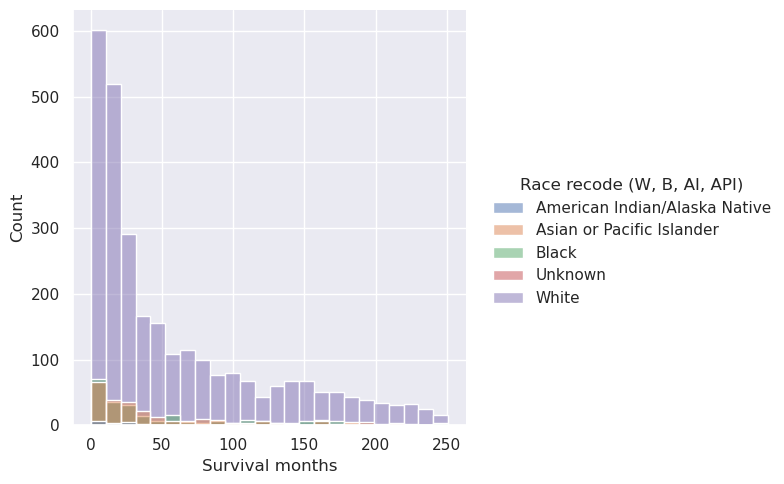

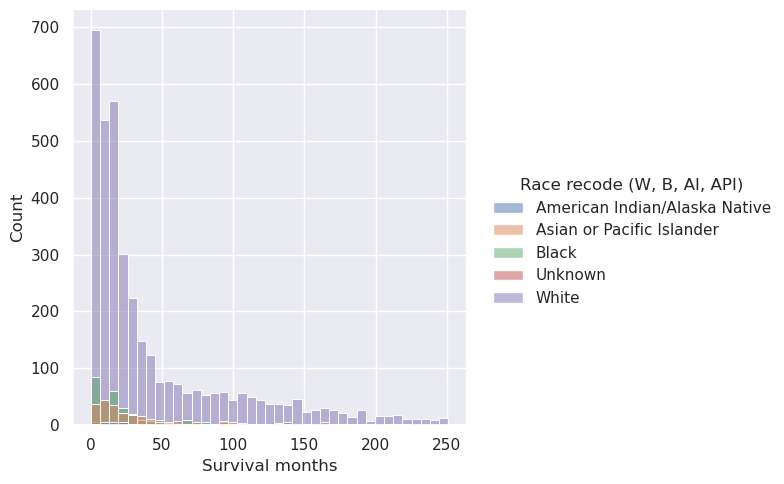

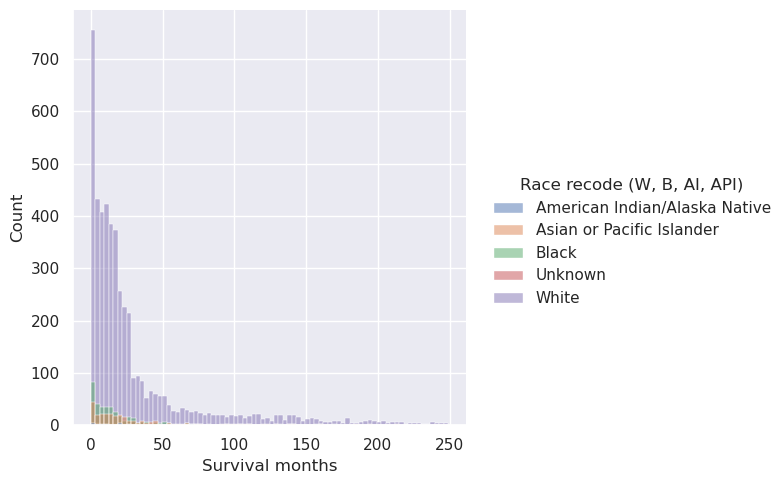

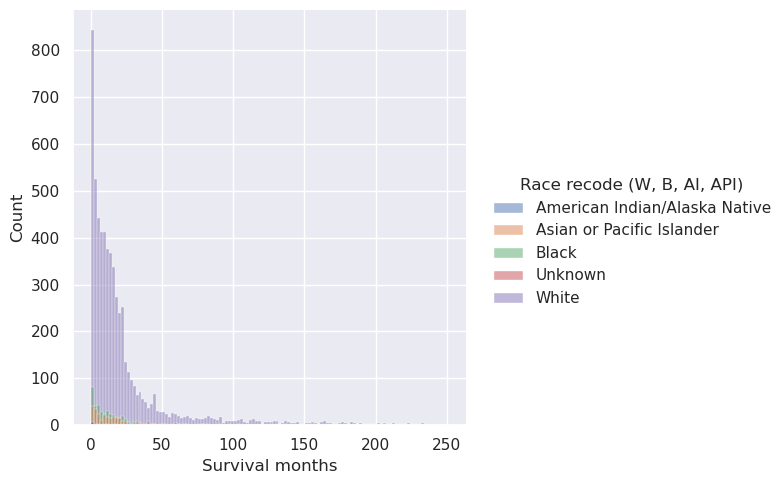

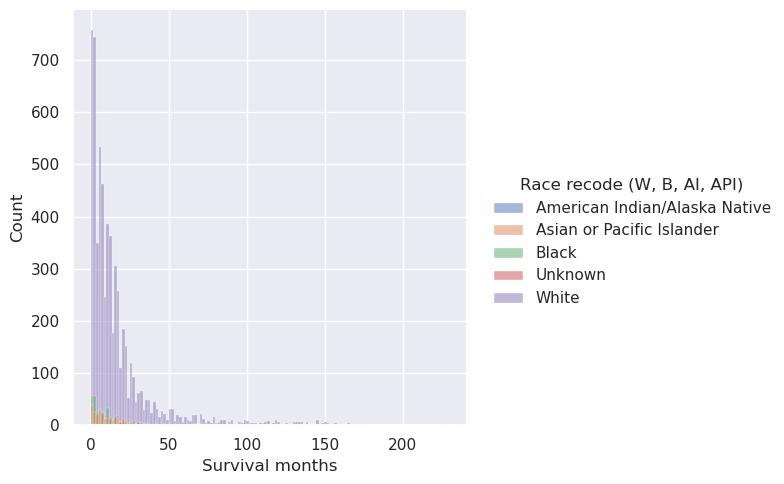

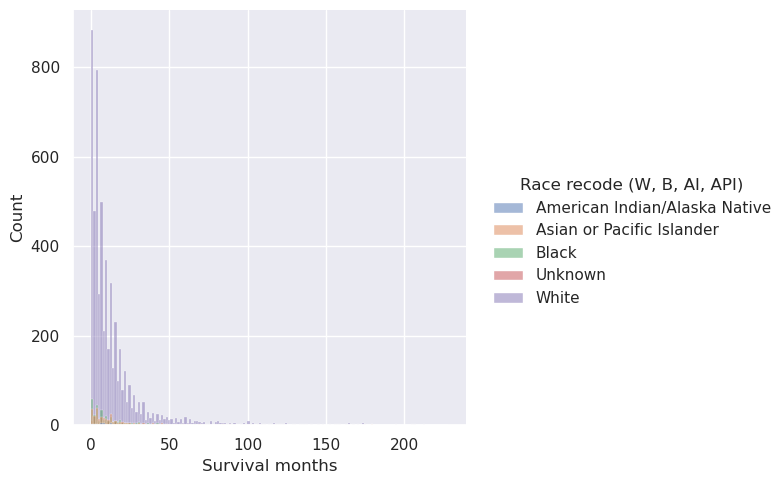

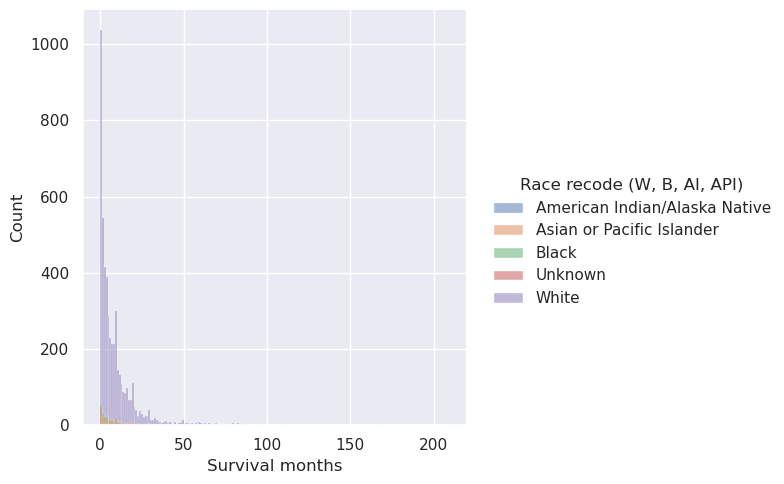

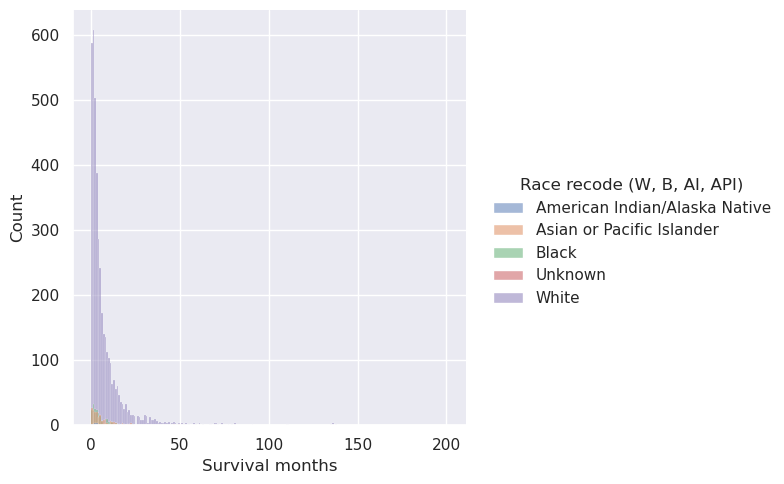

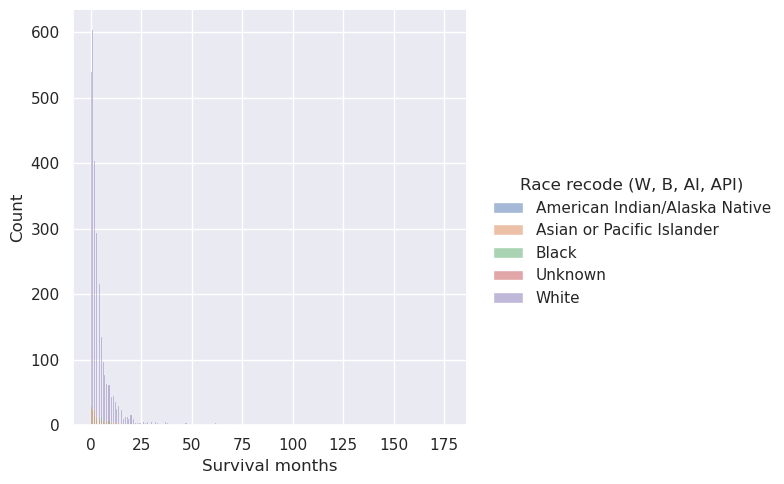

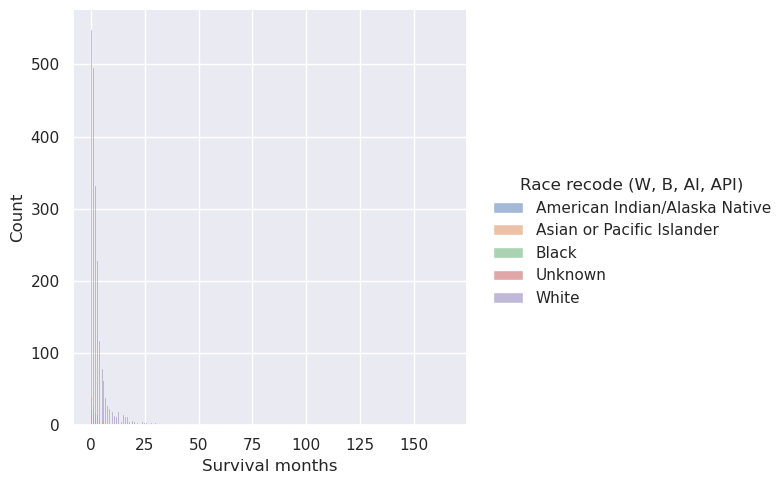

In [35]:
for age in sorted(d['Age recode with <1 year olds'].unique()):
    dd = d[d['Age recode with <1 year olds'] == age]
    sns.displot(data=dd, x='Survival months', hue='Race recode (W, B, AI, API)', kind='hist')

<Axes: xlabel='Year of diagnosis', ylabel='Survival months'>

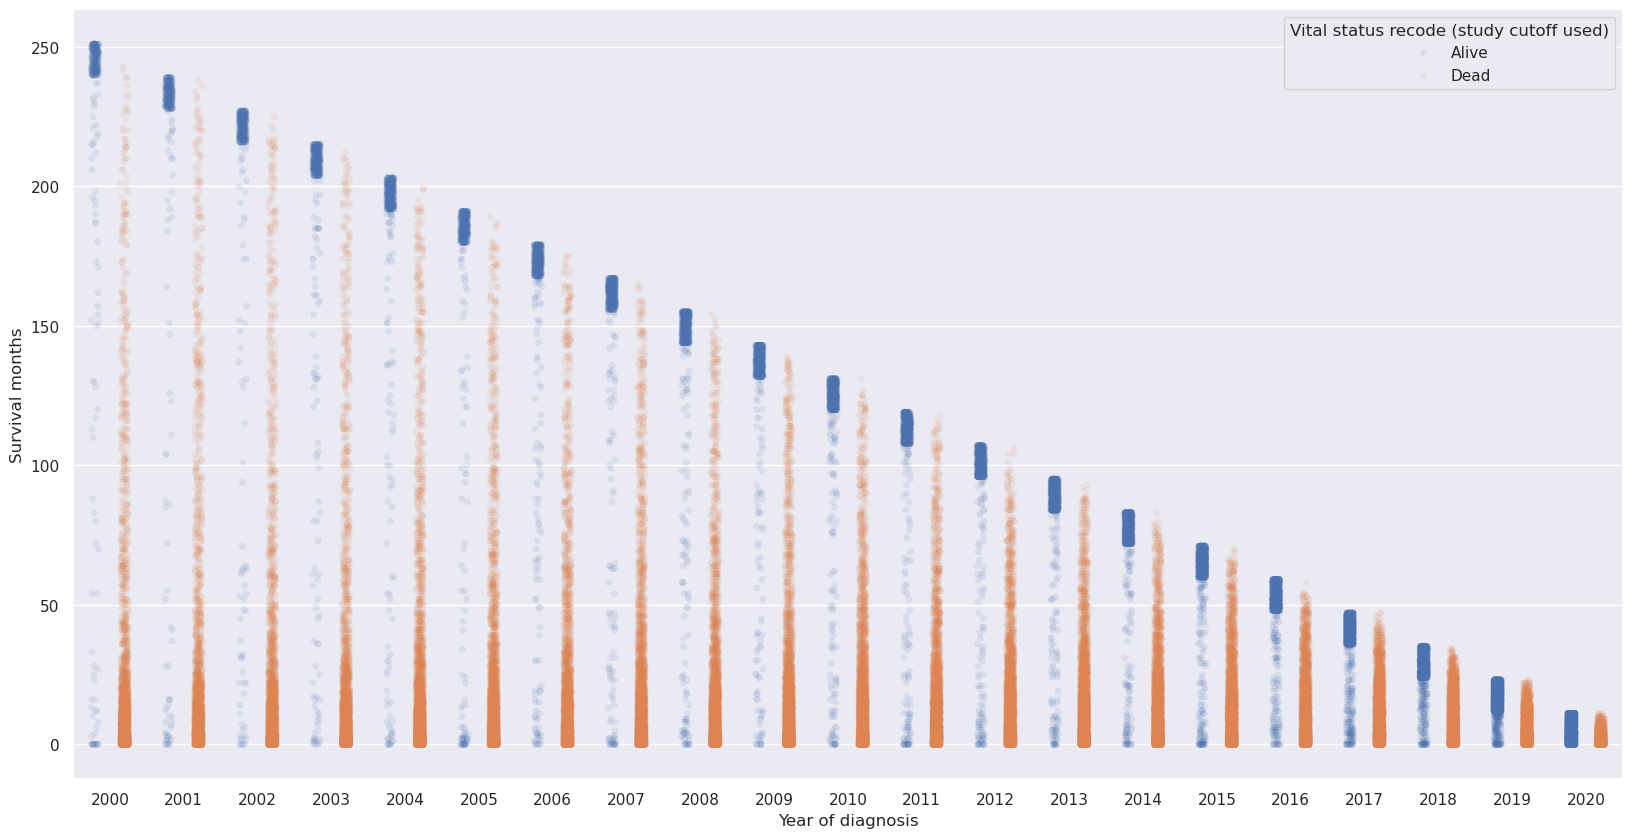

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(
    ax=ax,
    data=data,
    x='Year of diagnosis',
    y='Survival months',
    hue='Vital status recode (study cutoff used)',
    dodge=True,
    alpha=0.1
)

<Axes: xlabel='Vital status recode (study cutoff used)', ylabel='count'>

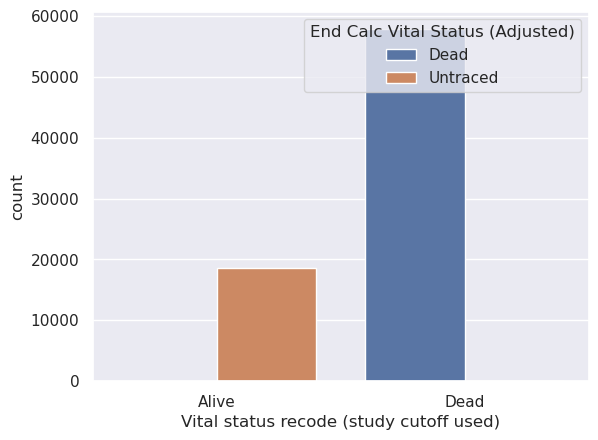

In [37]:
fig, ax = plt.subplots()
sns.countplot(
    ax=ax,
    data=data,
    x='Vital status recode (study cutoff used)',
    hue='End Calc Vital Status (Adjusted)'
)

<Axes: xlabel='Year of diagnosis', ylabel='Survival months'>

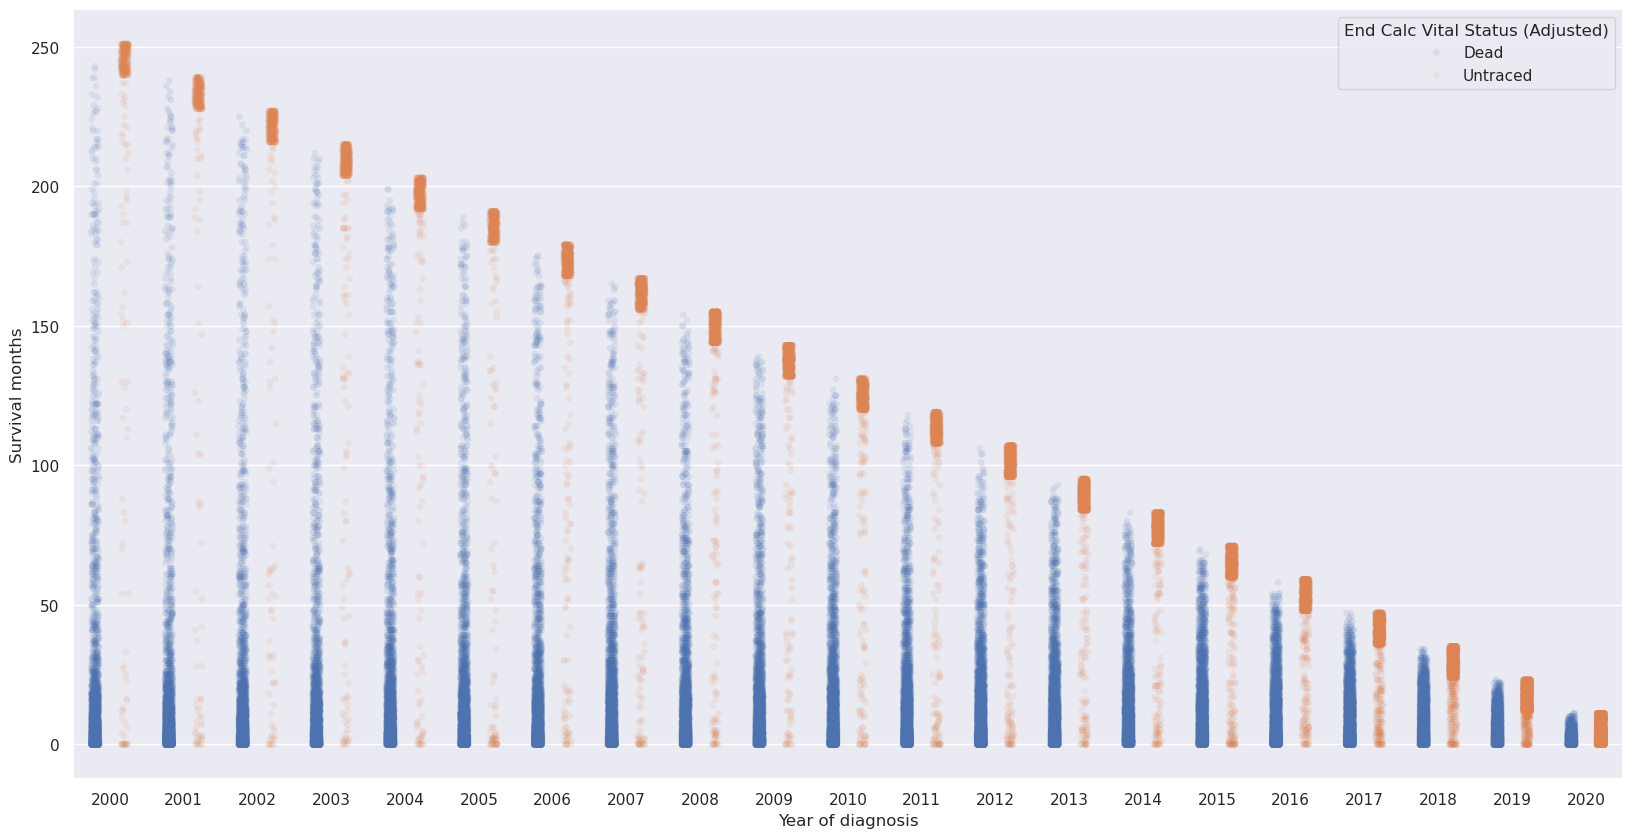

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(
    ax=ax,
    data=data,
    x='Year of diagnosis',
    y='Survival months',
    hue='End Calc Vital Status (Adjusted)',
    dodge=True,
    alpha=0.1
)

In [39]:
data['Survival months flag'].value_counts()

Survival months flag
Complete dates are available and there are more than 0 days of survival    76417
Name: count, dtype: int64

/tmp/ipykernel_26257/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


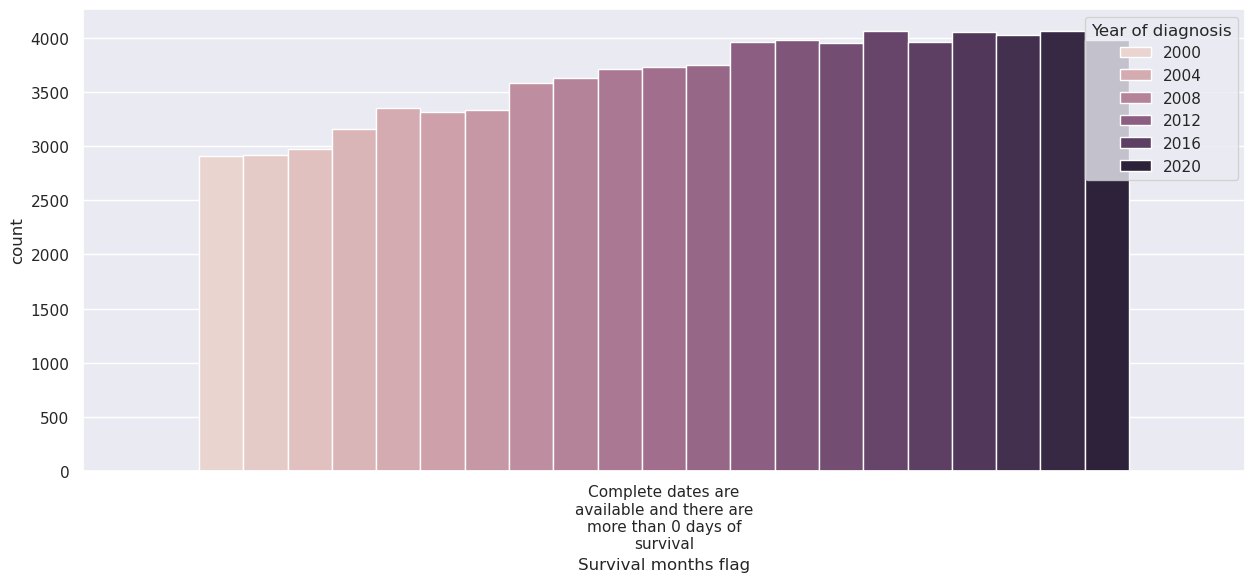

In [40]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(
    ax=ax,
    data=data,
    x='Survival months flag',
    hue='Year of diagnosis'
)
wrap_labels(ax, 25)

/tmp/ipykernel_26257/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_26257/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_26257/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_26257/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_26257/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_26257/580358642

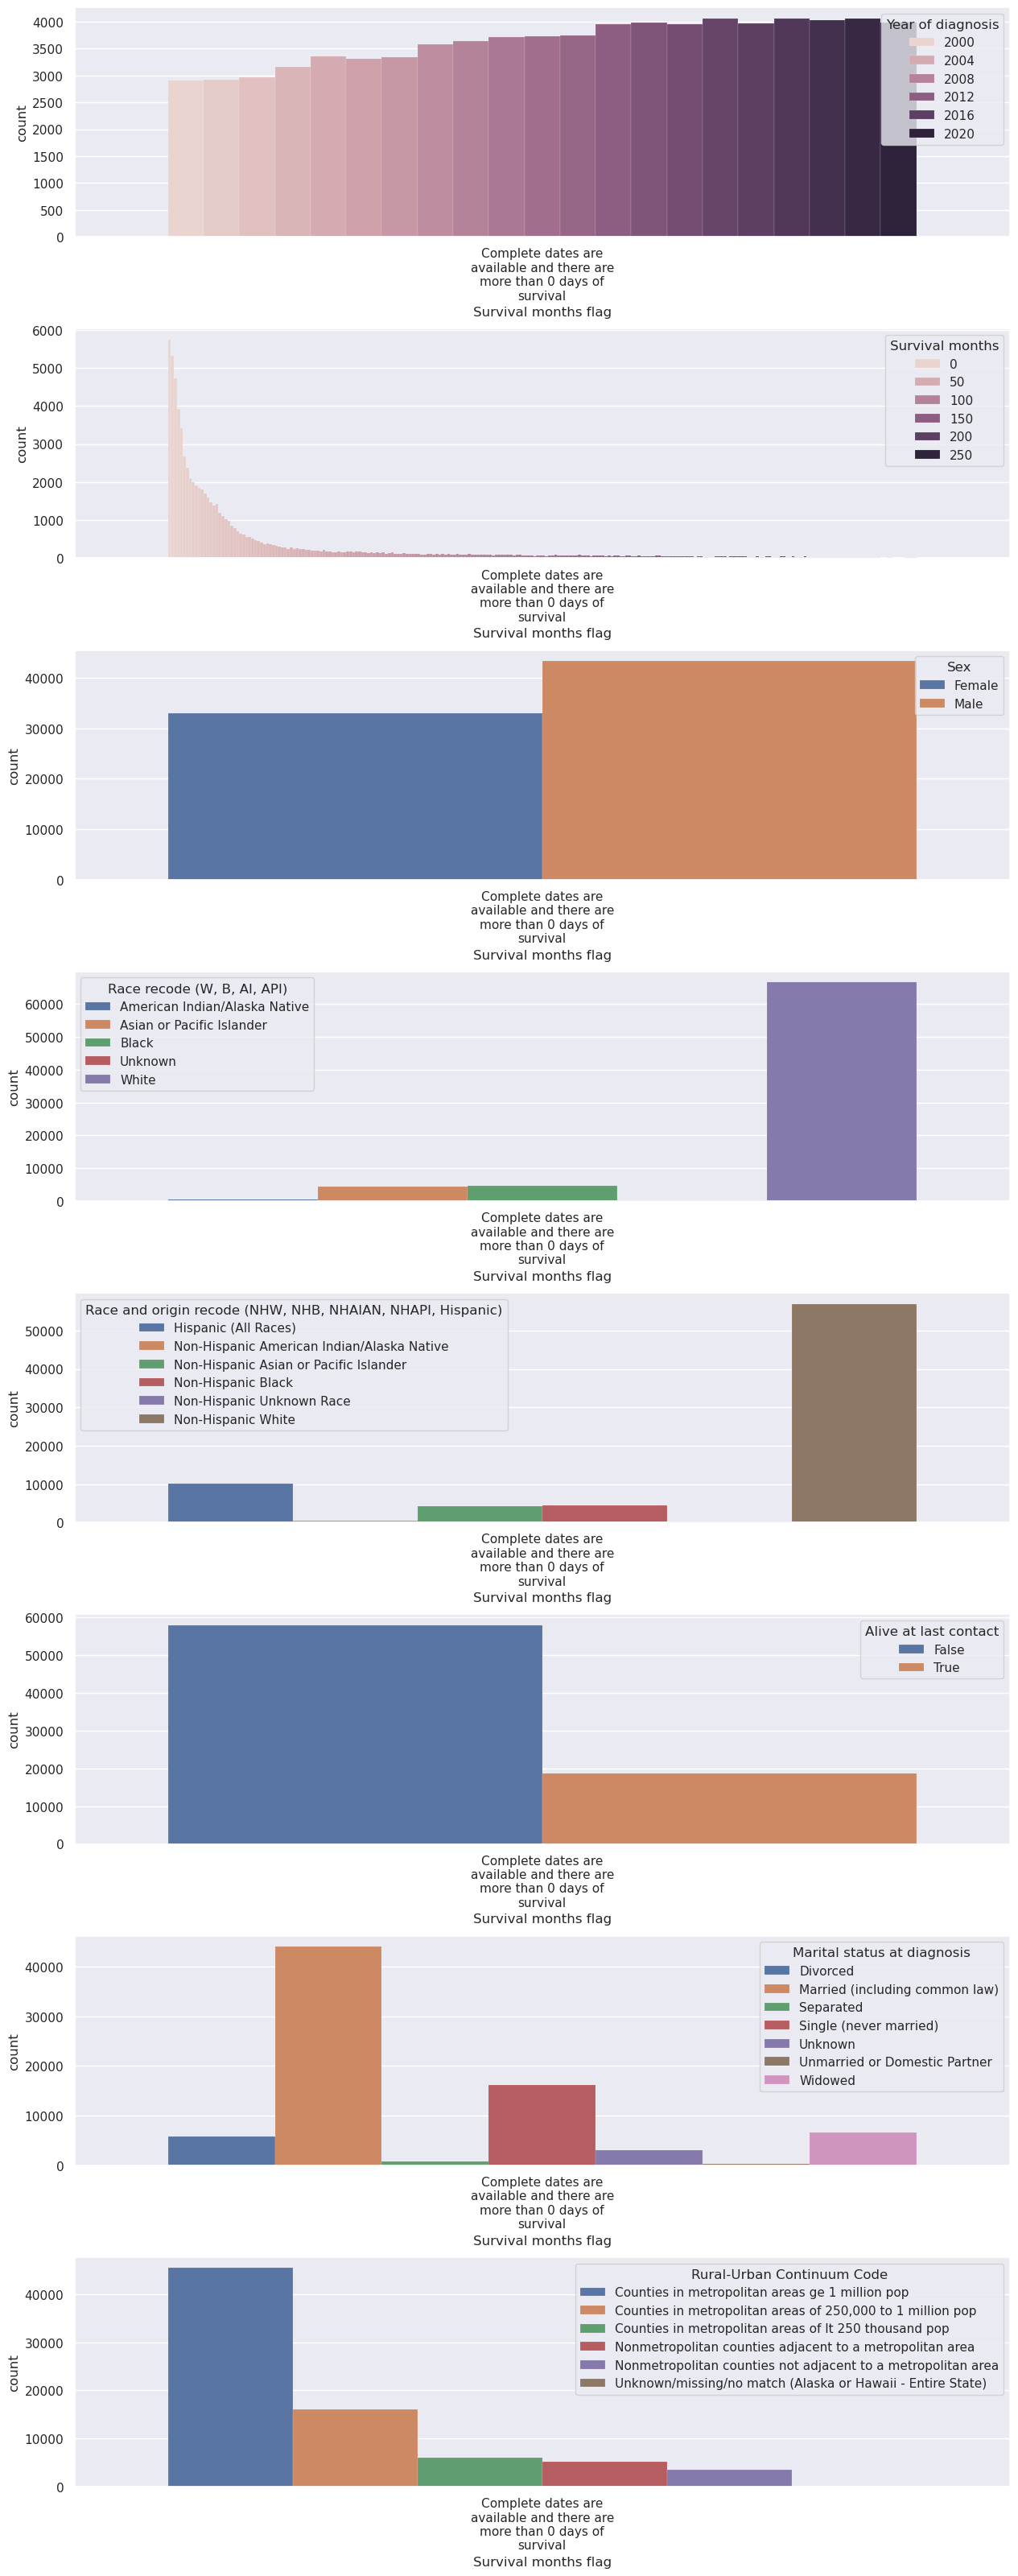

In [41]:
cols_to_plot = [
    'Year of diagnosis', 
    'Survival months', 
    'Sex', 
    'Race recode (W, B, AI, API)', 
    'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)',
    'Alive at last contact',
    'Marital status at diagnosis',
    'Rural-Urban Continuum Code',
]
fig, axarr = plt.subplots(len(cols_to_plot), 1, figsize=(15,5*len(cols_to_plot)))

for ax,col in zip(axarr, cols_to_plot):
    sns.countplot(
        ax=ax,
        data=data,
        x='Survival months flag',
        hue=col,
        linewidth=0.1
    )
    wrap_labels(ax, 25)
fig.subplots_adjust(hspace=0.4)

EOD 10 - size (1988-2003)
999    4733
050     922
040     854
030     633
060     627
       ... 
888       1
098       1
091       1
092       1
165       1
Name: count, Length: 109, dtype: int64


<Axes: ylabel='Frequency'>

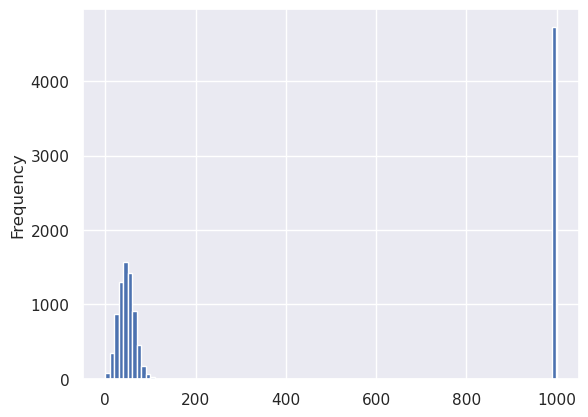

In [42]:
print(data['EOD 10 - size (1988-2003)'].value_counts())
data['EOD 10 - size (1988-2003)'].astype('Int64').plot.hist(bins=100)

CS tumor size (2004-2015)
999    9902
050    1911
040    1799
030    1462
060    1421
       ... 
927       1
156       1
910       1
938       1
810       1
Name: count, Length: 183, dtype: int64


<Axes: ylabel='Frequency'>

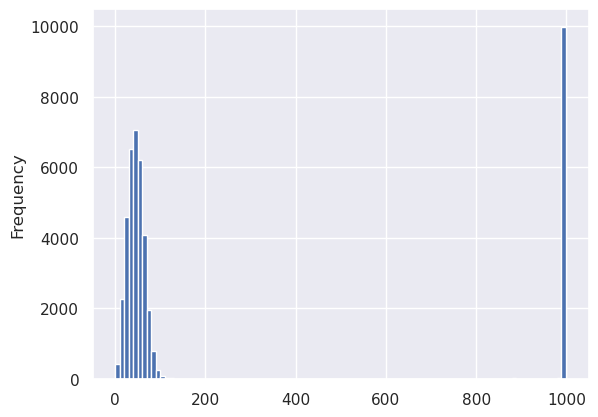

In [43]:
print(data['CS tumor size (2004-2015)'].value_counts())
data['CS tumor size (2004-2015)'].astype('Int64').plot.hist(bins=100)

Tumor Size Summary (2016+)
999    3617
050     622
040     567
030     501
060     463
       ... 
334       1
129       1
271       1
920       1
943       1
Name: count, Length: 135, dtype: int64


<Axes: ylabel='Frequency'>

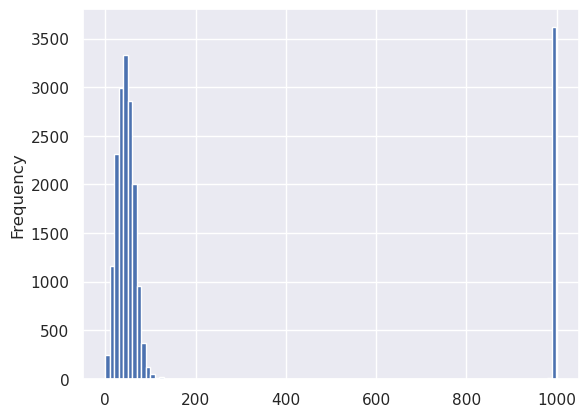

In [44]:
print(data["Tumor Size Summary (2016+)"].value_counts())
data["Tumor Size Summary (2016+)"].astype("Int64").plot.hist(bins=100)